# Edge Detection

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show(x):
    plt.figure(figsize=(10,10))
    plt.imshow(x, cmap='gray')

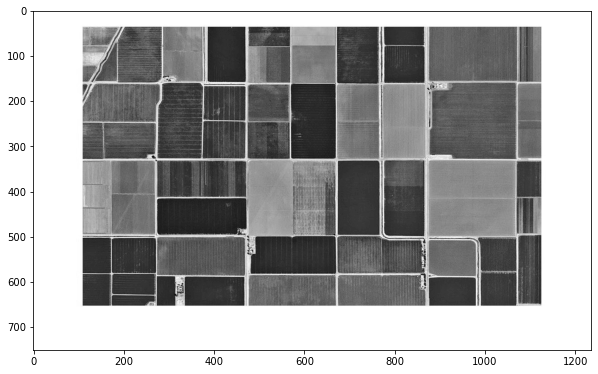

In [306]:
img = cv2.imread(r"C:/Users/aakas/Downloads/farmland4.jpeg")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img_gray)

In [274]:
kernel = np.ones((5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

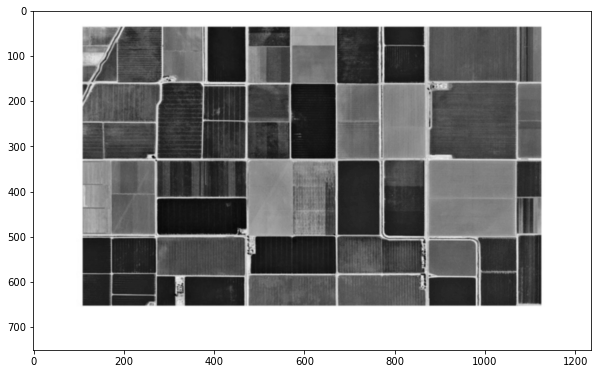

In [301]:
blur = cv2.GaussianBlur(img_gray, (5,5), 0)
show(blur)

### Edge detection using sobel but we can see that upper and side edges are not detected so let's try laplacian.

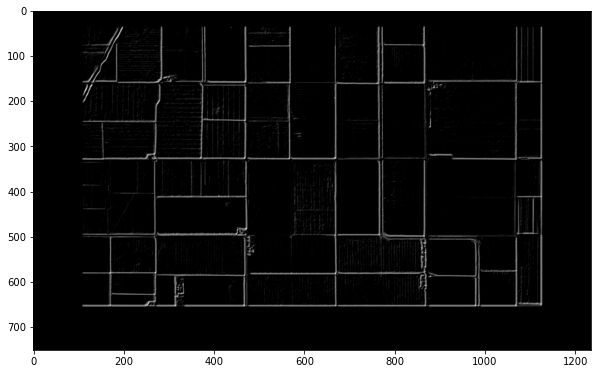

In [283]:
x = cv2.Sobel(blur, cv2.CV_8UC1, 1, 0, 3)
y = cv2.Sobel(blur, cv2.CV_8UC1, 0, 1, 3)
xy = cv2.addWeighted(src1=x, alpha=0.5, src2=y, beta=0.5, gamma=-10)
show(xy)

### Laplacian

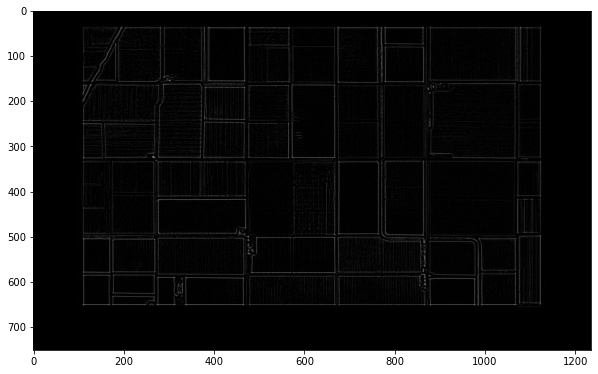

In [246]:
lap = cv2.Laplacian(blur, cv2.CV_8UC1)
show(lap)

### You can try morphologyEx operators if the image need to converted in color but above one is already black and white so moving without gradient implementation.

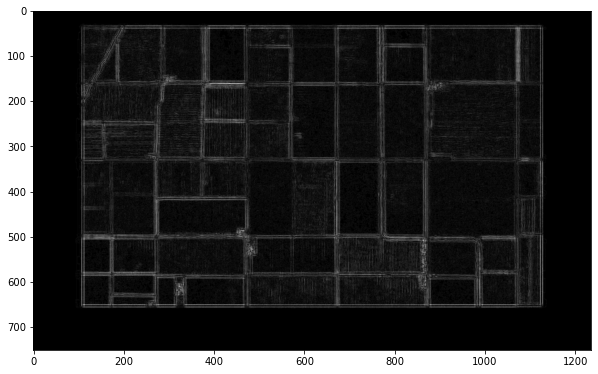

In [231]:
kernel = np.ones((2,2))

yx = cv2.morphologyEx(lap, cv2.MORPH_GRADIENT, kernel)
show(yx)

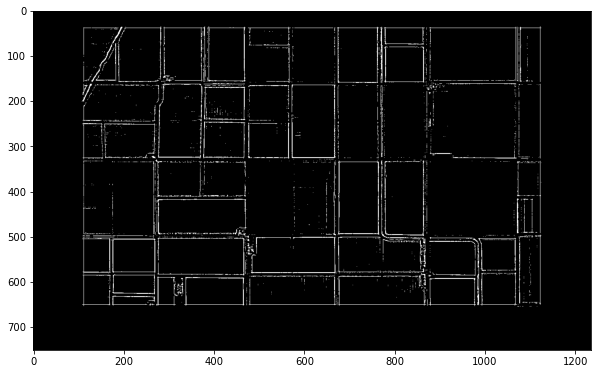

In [289]:
thresh, output1 = cv2.threshold(lap, 11, 255, cv2.THRESH_BINARY)
show(output1)

# Contours

In [290]:
contours, heirachy = cv2.findContours(output1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
#show(image)

In [286]:
heirachy

array([[[   1,   -1,   -1,   -1],
        [   2,    0,   -1,   -1],
        [   3,    1,   -1,   -1],
        ...,
        [  -1,   -1,   -1, 2390],
        [2393, 2390,   -1,   -1],
        [  -1, 2392,   -1,   -1]]], dtype=int32)

In [307]:
#ext_cont = np.zeros(output1.shape)

for i in range(len(contours)):
    
    if heirachy[0][i][3] == -1:
        
        cv2.drawContours(img, contours, i, (0,0,255), 3)

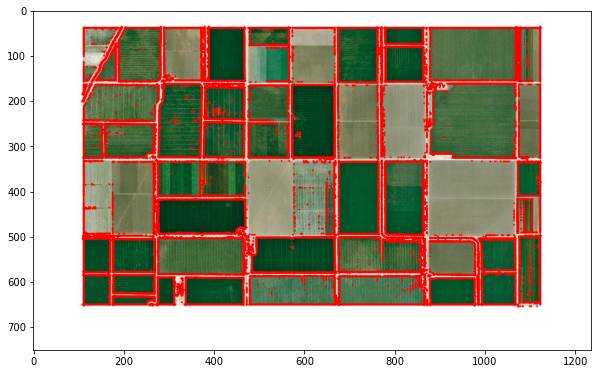

In [311]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img)